# <font color="#8333ff">TP : Pratiquez la régression logistique sur le jeu de données des maladies cardio-vasculaires</font>

Dans ce TP, vous allez appliquer la régression logistique sur le cas d'étude portant sur les maladies cardio-vasculaires.

## Importez les données

On charge tout d'abord les librairies nécessaires pour réaliser ce TP :

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

ModuleNotFoundError: No module named 'mass'

On importe ensuite les données :

In [2]:
maladie = pd.read_csv('maladie.txt', sep=";", decimal='.')
maladie.head()

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


Ces données contiennent les informations de 462 patients d'Afrique du Sud. On y trouve des informations telles que :
- la tension artérielle ;
- le fait de fumer ou pas ;
- l'adiposité ;
- l'obésité ;
- etc.

La variable CHD est la variable qui indique si la personne a une maladie cardio-vasculaire (1) ou pas (0).

## Visualisez le nuage de points

Pour étudier le fait d'être malade en fonction de l'âge, on peut visualiser le nuage de points :

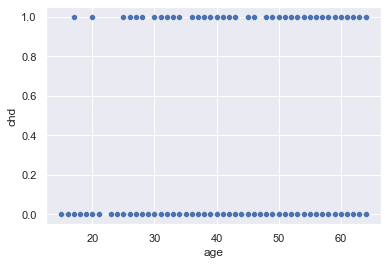

In [3]:
sns.set()

ax = sns.scatterplot(x="age", y="chd", data=maladie)

Il y a des 0 et des 1, mais il est ici difficile de dire si l'on est plus ou moins malade en fonction de l'âge.

On voit également qu'une régression linéaire sur un tel nuage de points n'aurait aucun sens, car elle nous donnerait des valeurs qui ne seraient quasiment jamais sur 0 ni 1.

## Calculez les proportions de malades

On peut calculer des classes d'âge et les proportions de malades associées.

In [4]:
maladie['cl_age'] = pd.cut(maladie['age'], bins = np.arange(15, 75, 10), right=False)
prop = pd.crosstab(maladie['cl_age'], maladie['chd'], normalize='index')
prop_chd = pd.DataFrame(data = {'age': np.concatenate((np.array([15]), 
                                                       np.repeat(np.arange(25,65,10), repeats=2), 
                                                       np.array([65])), axis=0),
                                'prop_chd': np.repeat(prop.loc[:,1].values, repeats=2)})

On peut représenter ces proportions :

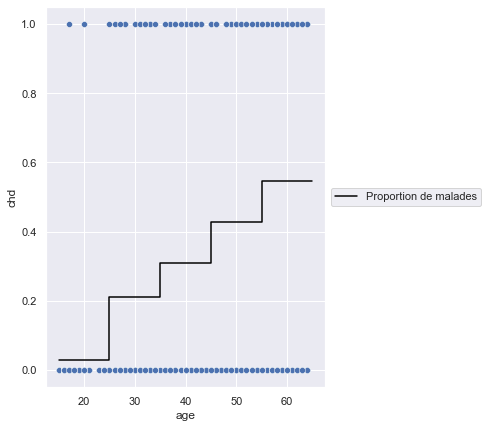

In [5]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

On y voit une fonction en escalier avec une forme de "S".

## Effectuez la régression logistique

Effectuons donc une régression logistique de CHD en fonction de l'âge :

In [6]:
reg_log1 = smf.glm('chd ~ age', data=maladie, family=sm.families.Binomial()).fit()

print(reg_log1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      460
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -262.78
Date:                Fri, 30 Oct 2020   Deviance:                       525.56
Time:                        18:20:06   Pearson chi2:                     445.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.5217      0.416     -8.465      0.0

On obtient les paramètres estimés : $\hat{\beta}_{1}=−3.5$ et $\hat{\beta}_{2}=0.064$. Enregistrons-les :

In [7]:
beta1 = reg_log1.params[0]
beta2 = reg_log1.params[1]

Dans le but de tracer la courbe logistique entre les abscisses $x=15$ et $x=65$, on définit une séquence de 15 à 65 par pas de 500, puis on la place dans la variable x. On calcule ensuite les ordonnées de la courbe, grâce à l'expression de la courbe en S :
<br><br><center><font size="4">$f(x) = \frac{e^{\beta_{1}+\beta_{2}x}}{1+e^{\beta_{1}+\beta_{2}x}}$</font></center>

Nous plaçons ces ordonnées dans la variable y. Enfin, avec x et y, nous créons un dataframe :

In [8]:
x = np.linspace(start=15, stop=65, num=500)
y = np.exp(beta1+beta2*x)/(1+np.exp(beta1+beta2*x))
reg_log = pd.DataFrame(data={'age': x, 'prop_chd': y})

Si l'on souhaite superposer la fonction de lien obtenue par régression logistique sur le graphique précédent, nous obtenons ceci :

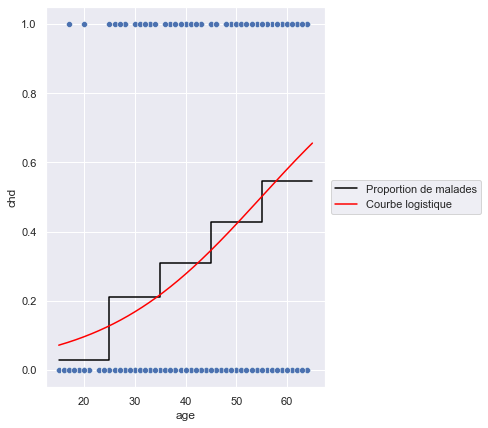

In [9]:
plt.figure(figsize=(5,7))
ax = sns.scatterplot(x="age", y="chd", data=maladie)
plt.plot(prop_chd['age'], prop_chd['prop_chd'], color='black', label='Proportion de malades')
plt.plot(reg_log['age'], reg_log['prop_chd'], color='red', label='Courbe logistique')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

La courbe rouge est celle qui est obtenue par régression logistique.

Si l'on avait voulu considérer l'ensemble des variables médicales (et non pas seulement l'âge comme jusqu'à présent), nous aurions écrit :

In [10]:
reg_log2 = smf.glm('chd~sbp+tobacco+ldl+adiposity+famhist+typea+obesity+alcohol+age',
                   data=maladie, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    chd   No. Observations:                  462
Model:                            GLM   Df Residuals:                      452
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -236.07
Date:                Fri, 30 Oct 2020   Deviance:                       472.14
Time:                        18:21:02   Pearson chi2:                     452.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -6.1507      1

Certaines des variables obtenues ont des p-valeurs qui sont inférieures au niveau de test de 5 %, ce qui nous indique qu'elles sont bien significatives. Certaines autres ne sont pas en dessous de ce seuil.

On peut donc passer sur une procédure de sélection en retirant les variables non significatives au fur et à mesure, comme vu précédemment.

Et voilà, vous avez appliqué une régression logistique permettant de traiter des variables qualitatives binaires (avec deux modalités). Sachez qu'il existe d'autres méthodes de classification permettant de traiter des variables quantitatives avec davantage de modalités !

In [14]:
maladie

,ind,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd,cl_age
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1,"[45, 55)"
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1,"[55, 65)"
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0,"[45, 55)"
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1,"[55, 65)"
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1,"[45, 55)"
...,...,...,...,...,...,...,...,...,...,...,...,...
457,459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0,"[55, 65)"
458,460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1,"[45, 55)"
459,461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0,"[55, 65)"
460,462,118,5.40,11.61,30.79,Absent,64,27.35,23.97,40,0,"[35, 45)"


In [15]:
from sklearn.feature_selection import RFE

features=['sbp','tobacco','ldl','adiposity','famhist','typea','obesity','alcohol','age']
X_train=maladie[features]
y_train=maladie['chd']

rfe = RFE(reg_log2, 9)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

C:\Users\Outils\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=9 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


AttributeError: 'GLMResults' object has no attribute '_get_tags'